<a href="https://colab.research.google.com/github/Shamil2007/DataAnalysis/blob/main/Data-Cleaning/handling_skewness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Understanding and Transforming Non-Normal Distributions (Skewness and Kurtosis)

#1. Foundations of Distribution Shapes

###Normal Distribution (Gaussian):

- Bell-shaped, symmetric around the mean (μ).

- Fully characterized by mean (μ) and variance (σ²).

- In the Data Generating Process (DGP) sense: it arises when many small, independent factors add together (Central Limit Theorem).

###Why real-world data deviates from normality:

- Natural Boundaries: You can't have negative age or income. This lower bound of zero often creates a long tail to the right.

- Multiplicative Processes: Think of viral content sharing or compound interest. Growth builds on itself, leading to a few massive values and many small ones (a right skew).

- Extreme Events: Financial crashes or natural disasters are rare but extreme, creating "fat tails" where outliers are more common than a normal distribution predicts.

👉 Think of the normal distribution as the “default,” but reality often has shocks, boundaries, and nonlinear growth that break symmetry.

Key Insight: Don't expect raw data to be normal. The goal is to have model residuals that are well-behaved and approximately normal.

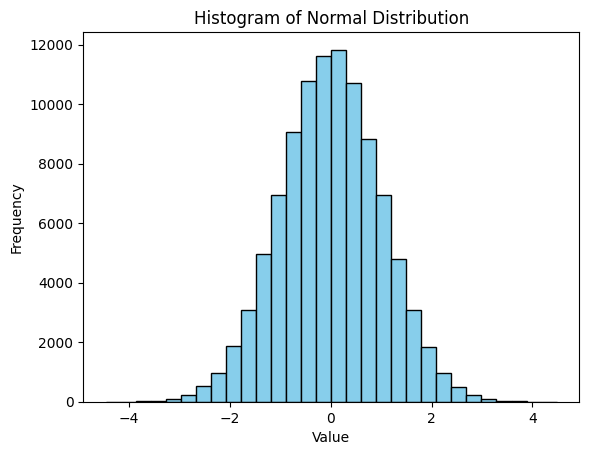

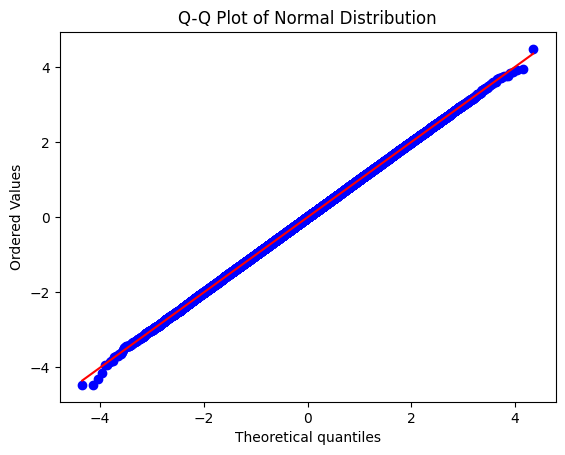

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

n = 100000
normal_dis = np.random.normal(loc=0, scale=1, size=n)

# Plot histogram
plt.hist(normal_dis, bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram of Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot (Probability Plot)
stats.probplot(normal_dis, dist="norm", plot=plt)
plt.title("Q-Q Plot of Normal Distribution")
plt.show()

#2. Skewness: The Measure of Asymmetry

###Concept:

- Skewness tells us whether the “tail” of the distribution is longer on the right or left.

- Mean vs. Median mismatch is a clue.

###Types & Analogies:

- Right-skewed (positive): The long tail is on the right. The mean is typically greater than the median.
    - Example: Income distribution. Most people earn a moderate amount, a few earn a lot, pulling the average up.

    - Analogy: “A room where most people are sitting on the floor, but a few are on very tall ladders.”

- Left-skewed (negative): The long tail is on the left. The mean is typically less than the median.
    - Example: Exam scores where most students scored very high, and a few scored very low.

    - Analogy: “Most kids score 95+, but a few got 30.”

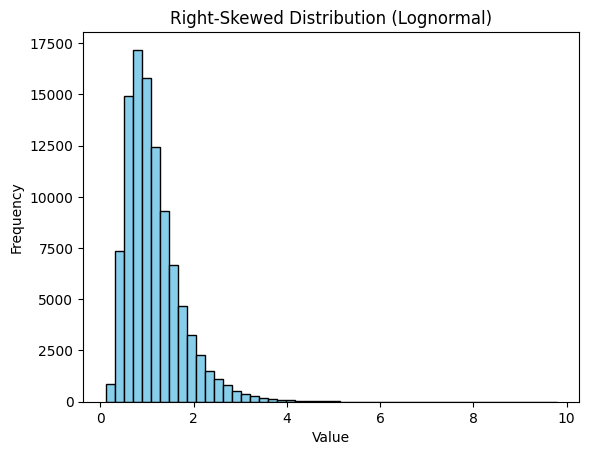

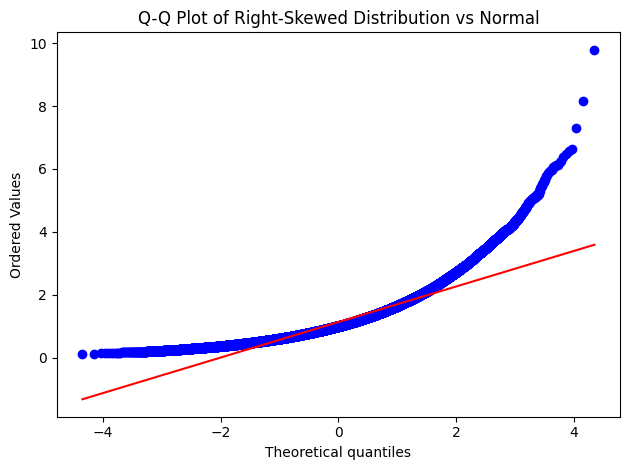

In [14]:
right_skewed_light = np.random.lognormal(mean=0, sigma=0.5, size=n)

# Histogram
plt.hist(right_skewed_light, bins=50, color="skyblue", edgecolor="black")
plt.title("Right-Skewed Distribution (Lognormal)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot
stats.probplot(right_skewed_light, dist="norm", plot=plt)
plt.title("Q-Q Plot of Right-Skewed Distribution vs Normal")
plt.tight_layout()
plt.show()

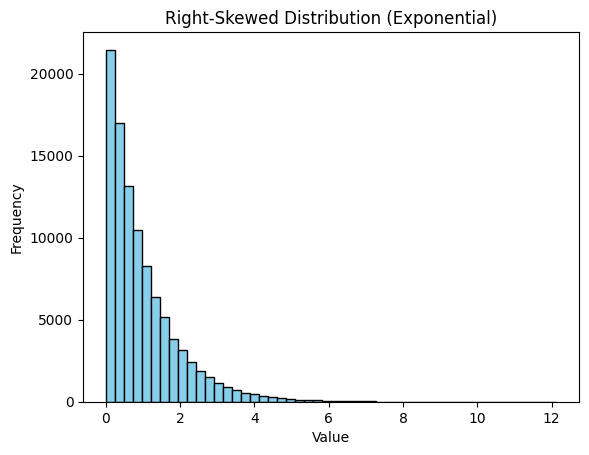

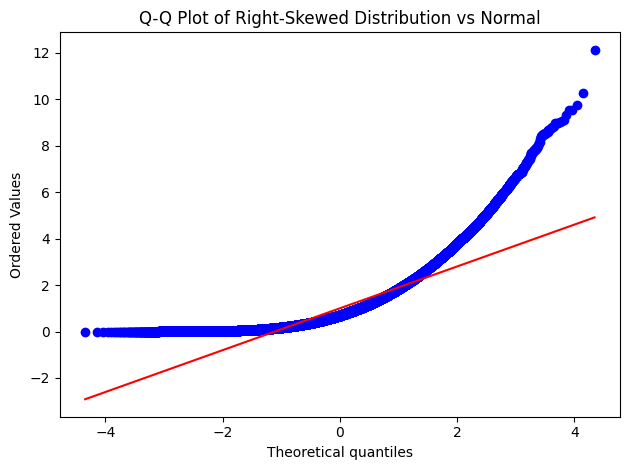

In [15]:
right_skewed_severe = np.random.exponential(scale=1, size=n)

# Histogram
plt.hist(right_skewed_severe, bins=50, color="skyblue", edgecolor="black")
plt.title("Right-Skewed Distribution (Exponential)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot
stats.probplot(right_skewed_severe, dist="norm", plot=plt)
plt.title("Q-Q Plot of Right-Skewed Distribution vs Normal")
plt.tight_layout()
plt.show()

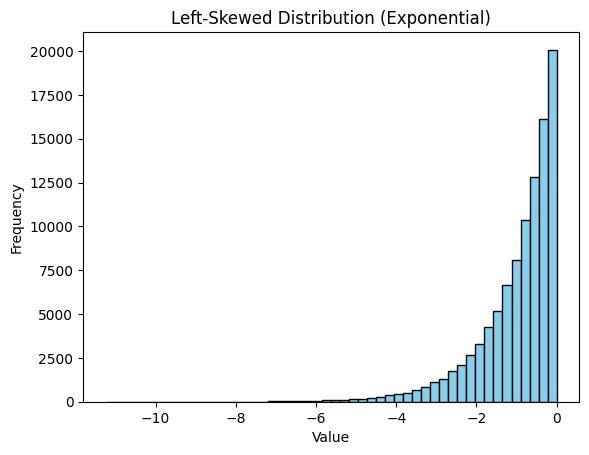

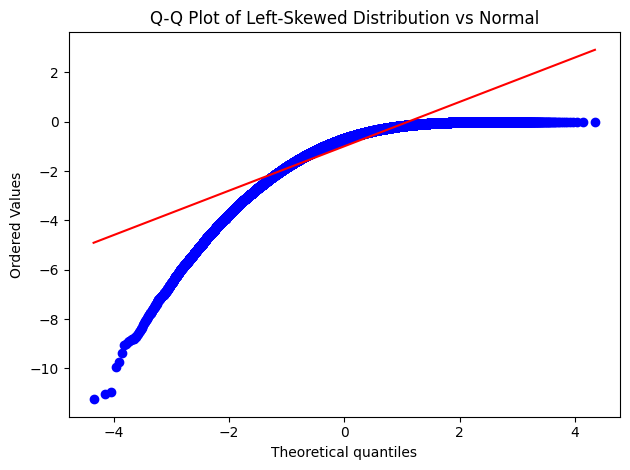

In [16]:
left_skewed = -np.random.exponential(scale=1, size=n)

# Histogram
plt.hist(left_skewed, bins=50, color="skyblue", edgecolor="black")
plt.title("Left-Skewed Distribution (Exponential)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot
stats.probplot(left_skewed, dist="norm", plot=plt)
plt.title("Q-Q Plot of Left-Skewed Distribution vs Normal")
plt.tight_layout()
plt.show()

##Fisher–Pearson (Third Standardized Moment) – the true skewness

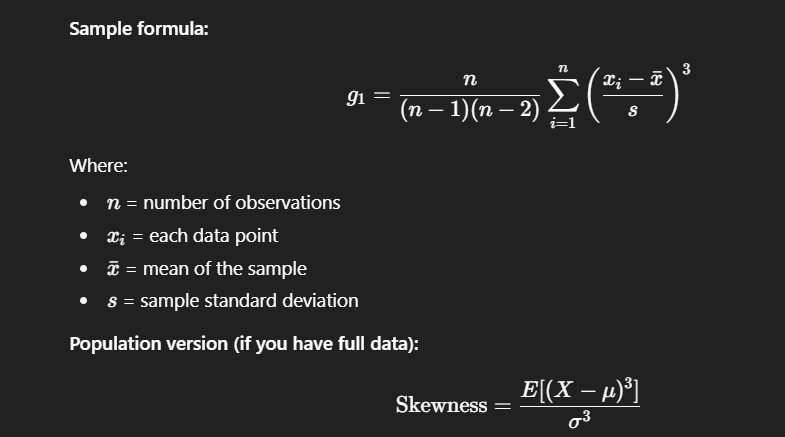

In [17]:
from scipy.stats import skew

# True skewness (Fisher-Pearson) for each dataset
normal_dis_skewness = skew(normal_dis, bias=False)
right_skewed_skewness = skew(right_skewed_light, bias=False)
left_skewed_skewness = skew(left_skewed, bias=False)

print(f"Normal distribution: {normal_dis_skewness}")
print(f"Right-skewed distribution: {right_skewed_skewness}")
print(f"Left-skewed distribution: {left_skewed_skewness}")

Normal distribution: -0.0017604027583433218
Right-skewed distribution: 1.6936664126987386
Left-skewed distribution: -1.973765577777922


##Formula (Pearson’s First Coefficient of Skewness):

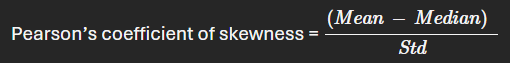

In [18]:
#Mean
normal_dis_mean = normal_dis.mean()
right_skewed_mean = right_skewed_light.mean()
left_skewed_mean = left_skewed.mean()

#Median
normal_dis_median = np.median(normal_dis)
right_skewed_median = np.median(right_skewed_light)
left_skewed_median = np.median(left_skewed)

#Std - Standard Deviation
normal_dis_std = normal_dis.std()
right_skewed_std = right_skewed_light.std()
left_skewed_std = left_skewed.std()

In [19]:
normal_dis_skewness = (normal_dis_mean - normal_dis_median) / normal_dis_std
print(f"Normal distribution: {normal_dis_skewness}")
right_skewed_skewness = (right_skewed_mean - right_skewed_median) / right_skewed_std
print(f"Right-skewed distribution: {right_skewed_skewness}")
left_skewed_skewness = (left_skewed_mean - left_skewed_median) / left_skewed_std
print(f"Left-skewed distribution: {left_skewed_skewness}")

Normal distribution: -0.0016812284357765608
Right-skewed distribution: 0.22120224477749115
Left-skewed distribution: -0.30559226641802717


###What Skewness Tells Us

Skewness tells us how the data distribution is shaped compared to a normal (bell-shaped) distribution:

- Skewness = 0 → perfectly symmetric (normal distribution, mean = median = mode).

- Skewness > 0 → right-skewed (positively skewed):

    - Tail is longer on the right side.

    - Mean > Median > Mode.

- Skewness < 0 → left-skewed (negatively skewed):

    - Tail is longer on the left side.

    - Mean < Median < Mode.

#Kurtosis

Kurtosis is a statistical measure that describes the shape of a probability distribution, specifically by quantifying the weight of its tails relative to a normal distribution (Gaussian distribution).

In practical terms, kurtosis measures the propensity of a distribution to produce extreme values or outliers.

1. Mesokurtic (Normal Tails): Kurtosis ≈ 3. Or, "Excess Kurtosis" ≈ 0. This is our baseline.

2. Leptokurtic (Fat Tails): Excess Kurtosis > 0. Outliers are more common than expected.

    - Example: Financial returns. Mostly calm, but occasionally wild swings.

3. Platykurtic (Thin Tails): Excess Kurtosis < 0. Outliers are less common than expected.

    - Example: Data from a uniform distribution. Values are very contained.

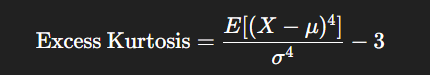

Normal Kurtosis is without -3

In [20]:
from scipy.stats import kurtosis

normal_dis_kurtosis = kurtosis(normal_dis, bias=False)
right_skewed_kurtosis = kurtosis(right_skewed_light, bias=False)
left_skewed_kurtosis = kurtosis(left_skewed, bias=False)

print(f"Normal distribution: {normal_dis_kurtosis}")
print(f"Right-skewed distribution: {right_skewed_kurtosis}")
print(f"Left-skewed distribution: {left_skewed_kurtosis}")

Normal distribution: -0.007977348860332967
Right-skewed distribution: 5.364303006961567
Left-skewed distribution: 5.754895745168213


# Skewness vs Kurtosis

| **Feature** | **Focuses On**              | **Simple Question it Answers**                  | **Alternative Way to Think** |
|-------------|------------------------------|------------------------------------------------|-------------------------------|
| **Skewness** | **Asymmetry of distribution** | "Which side (left or right) has the longer tail?" | Is the data pulled more to the left, right, or balanced? |
| **Kurtosis** | **Tailedness / Outlier influence** | "How heavy or light are the tails compared to a normal distribution?" | Are extreme values more or less common than in a normal distribution? |


Skewness = shape leaning (direction of stretch).

Kurtosis = tail heaviness (outlier sensitivity).

#How to handle with skewness and Kurtosis

### Why is it a problem?

* Many models (e.g., **linear regression, logistic regression, PCA**) assume data is **normally distributed**.
* Skewed data → biased estimates, poor predictions, non-normal residuals.

### 📌 Solutions:

1. **Transformations** (best for moderate skewness):

   * **Log transform** → reduces right skew (good for income, prices).
   * **Square root transform** → reduces skew, less aggressive than log.
   * **Cube root transform** → works for both positive & negative skew.
   * **Box-Cox / Yeo-Johnson** → more flexible, automatically adjusts.

2. **Capping / Winsorizing** (for extreme skewness & outliers):

   * Replace extreme values with percentiles (e.g., top 1% → 99th percentile).

3. **Binning**:

   * Convert continuous skewed data into categories (useful in decision trees).

4. **Non-parametric models**:

   * Some models (Random Forest, XGBoost) handle skewed distributions better, so transformations may not be needed.

---

## 🔹 Handling **Kurtosis**

👉 Kurtosis = measures **peakedness** & **tail heaviness** of a distribution.

* **Normal distribution kurtosis = 3 (mesokurtic).**
* **High kurtosis (>3, leptokurtic):** Heavy tails, outliers likely (e.g., financial returns).
* **Low kurtosis (<3, platykurtic):** Light tails, fewer outliers (e.g., uniform-like data).

### Why is it a problem?

* High kurtosis = **outliers dominate**.
* Low kurtosis = data lacks variability.

### 📌 Solutions:

1. **For high kurtosis (outliers issue):**

   * Use **robust scaling** (median & IQR instead of mean & std).
   * Apply **transformations** (log, Box-Cox) to reduce tail weight.
   * Winsorizing (cap extreme values).
   * Consider **robust models** (Huber regression, tree-based models).

2. **For low kurtosis:**

   * Usually not a big problem, but it can signal loss of information.
   * If needed, check if binning / categorization caused oversmoothing.


✅ **Summary Table**

| Problem       | Why it’s bad                  | Fixes                                      |
| ------------- | ----------------------------- | ------------------------------------------ |
| Positive skew | Long right tail, affects mean | Log / sqrt / Box-Cox                       |
| Negative skew | Long left tail                | Cube root / square                         |
| High kurtosis | Heavy tails, many outliers    | Robust scaling, winsorize, transformations |
| Low kurtosis  | Too flat, little variation    | Usually fine, but check binning            |

# Examples for handling

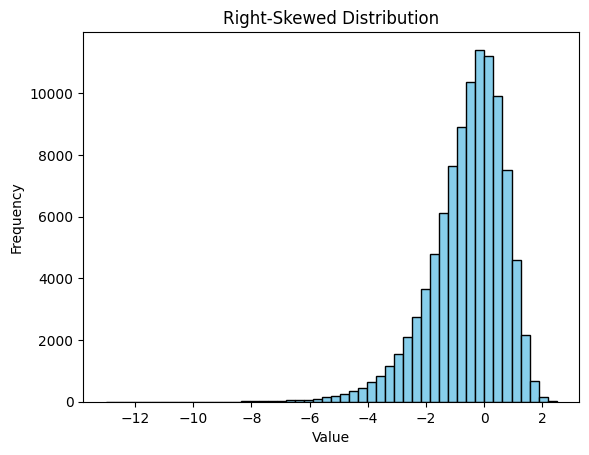

In [21]:
handled_right_skewed = np.log(right_skewed_severe)

plt.hist(handled_right_skewed, bins=50, color="skyblue", edgecolor="black")
plt.title("Right-Skewed Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

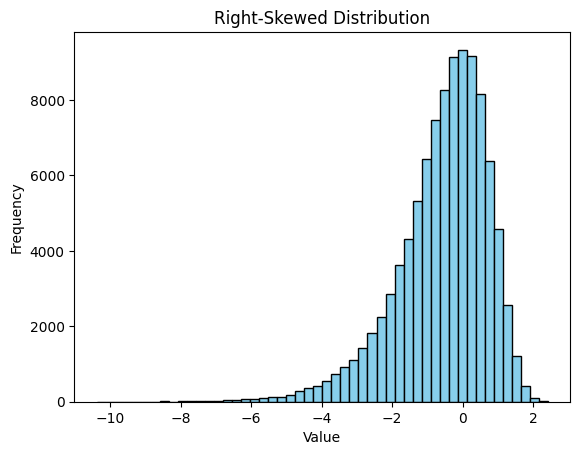

In [22]:
left_skewed = -left_skewed
handled_left_skewed = np.log(left_skewed)

plt.hist(handled_left_skewed, bins=50, color="skyblue", edgecolor="black")
plt.title("Right-Skewed Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()